In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/cycle_both.csv')

cpu_df['cpu_percent'] = percent_scaling(cpu_df['cpu_percent'])
cpu_df['virtual_memory'] = percent_scaling(cpu_df['virtual_memory'])
cpu_df['adc_voltage_norm'] = min_max_scaling(cpu_df['adc_voltage'])

cpu_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749
1,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320
2,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073
3,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633
4,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928
...,...,...,...,...,...
4295,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235
4296,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699
4297,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982
4298,2023-04-26 14:08:04.046017,0.143,0.156,0.107753,0.007271


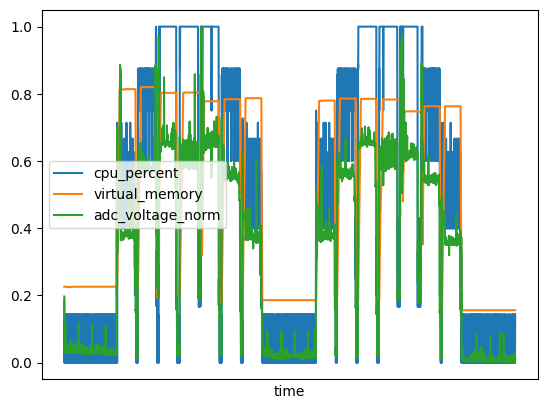

In [4]:
cpu_df_plot = cpu_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
cpu_df_plot.get_figure().savefig('cpu_stress_test.pdf', format='pdf')

In [5]:
cpu_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.846077,0.966865,0.966865
virtual_memory,0.846077,1.000000,0.852707,0.852707
adc_voltage,0.966865,0.852707,1.000000,1.000000
adc_voltage_norm,0.966865,0.852707,1.000000,1.000000


In [6]:
cpu_pca = PCA(n_components=4)
cpu_pca.fit(cpu_df.drop('time', axis=1))
cpu_pca.components_

array([[ 7.22234670e-01,  4.77231003e-01,  1.40437892e-01,
         4.80525598e-01],
       [ 4.30939928e-01, -8.76644271e-01,  6.00252899e-02,
         2.05383945e-01],
       [-5.40987856e-01, -6.11996052e-02,  2.35303634e-01,
         8.05120455e-01],
       [-0.00000000e+00, -2.92509993e-16,  9.59847052e-01,
        -2.80523862e-01]])

In [7]:
mem_df = pd.read_csv('../results/cycle_both.csv')

mem_df['cpu_percent'] = percent_scaling(mem_df['cpu_percent'])
mem_df['virtual_memory'] = percent_scaling(mem_df['virtual_memory'])
mem_df['adc_voltage_norm'] = min_max_scaling(mem_df['adc_voltage'])

mem_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749
1,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320
2,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073
3,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633
4,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928
...,...,...,...,...,...
4295,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235
4296,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699
4297,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982
4298,2023-04-26 14:08:04.046017,0.143,0.156,0.107753,0.007271


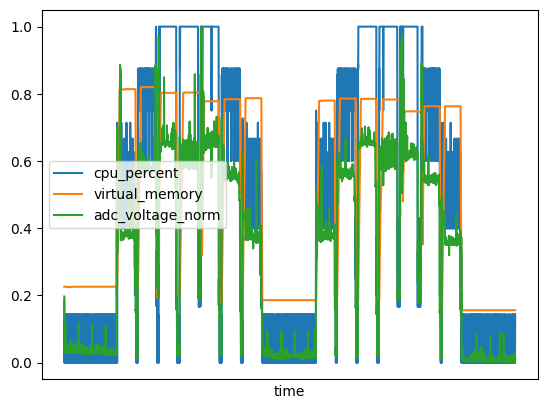

In [8]:
mem_df_plot = mem_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
mem_df_plot.get_figure().savefig('mem_stress_test.pdf', format='pdf')

In [9]:
mem_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.846077,0.966865,0.966865
virtual_memory,0.846077,1.000000,0.852707,0.852707
adc_voltage,0.966865,0.852707,1.000000,1.000000
adc_voltage_norm,0.966865,0.852707,1.000000,1.000000


In [10]:
mem_pca = PCA(n_components=4)
mem_pca.fit(mem_df.drop('time', axis=1))
mem_pca.components_

array([[ 7.22234670e-01,  4.77231003e-01,  1.40437892e-01,
         4.80525598e-01],
       [ 4.30939928e-01, -8.76644271e-01,  6.00252899e-02,
         2.05383945e-01],
       [-5.40987856e-01, -6.11996052e-02,  2.35303634e-01,
         8.05120455e-01],
       [-0.00000000e+00, -2.92509993e-16,  9.59847052e-01,
        -2.80523862e-01]])

In [11]:
both_df = pd.read_csv('../results/cycle_both_ina3221.csv')

both_df['cpu_percent'] = percent_scaling(both_df['cpu_percent'])
both_df['virtual_memory'] = percent_scaling(both_df['virtual_memory'])
both_df['adc_voltage_norm'] = min_max_scaling(both_df['adc_voltage'])

both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-09-20 15:23:47.019652,0.237,0.220,0.2036,0.219409
1,2023-09-20 15:23:47.121838,0.000,0.220,0.1432,0.060127
2,2023-09-20 15:23:47.223856,0.000,0.220,0.1300,0.025316
3,2023-09-20 15:23:47.325809,0.024,0.220,0.1264,0.015823
4,2023-09-20 15:23:47.427818,0.000,0.220,0.1260,0.014768
...,...,...,...,...,...
425,2023-09-20 15:24:49.811235,0.000,0.188,0.1224,0.005274
426,2023-09-20 15:24:49.913940,0.000,0.188,0.1236,0.008439
427,2023-09-20 15:24:50.016594,0.000,0.188,0.1244,0.010549
428,2023-09-20 15:24:50.119286,0.000,0.188,0.1220,0.004219


In [12]:
both_df['datetime'] = pd.to_datetime(both_df['time'])

dt_origin = both_df['datetime'][0]
both_df['delta'] = both_df['datetime'].apply(lambda dt: (dt - dt_origin).total_seconds())

both_df = both_df.set_index(pd.DatetimeIndex(both_df['datetime']))
both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm,datetime,delta
datetime,,,,,,,
2023-09-20 15:23:47.019652,2023-09-20 15:23:47.019652,0.237,0.220,0.2036,0.219409,2023-09-20 15:23:47.019652,0.000000
2023-09-20 15:23:47.121838,2023-09-20 15:23:47.121838,0.000,0.220,0.1432,0.060127,2023-09-20 15:23:47.121838,0.102186
2023-09-20 15:23:47.223856,2023-09-20 15:23:47.223856,0.000,0.220,0.1300,0.025316,2023-09-20 15:23:47.223856,0.204204
2023-09-20 15:23:47.325809,2023-09-20 15:23:47.325809,0.024,0.220,0.1264,0.015823,2023-09-20 15:23:47.325809,0.306157
2023-09-20 15:23:47.427818,2023-09-20 15:23:47.427818,0.000,0.220,0.1260,0.014768,2023-09-20 15:23:47.427818,0.408166
...,...,...,...,...,...,...,...
2023-09-20 15:24:49.811235,2023-09-20 15:24:49.811235,0.000,0.188,0.1224,0.005274,2023-09-20 15:24:49.811235,62.791583
2023-09-20 15:24:49.913940,2023-09-20 15:24:49.913940,0.000,0.188,0.1236,0.008439,2023-09-20 15:24:49.913940,62.894288
2023-09-20 15:24:50.016594,2023-09-20 15:24:50.016594,0.000,0.188,0.1244,0.010549,2023-09-20 15:24:50.016594,62.996942


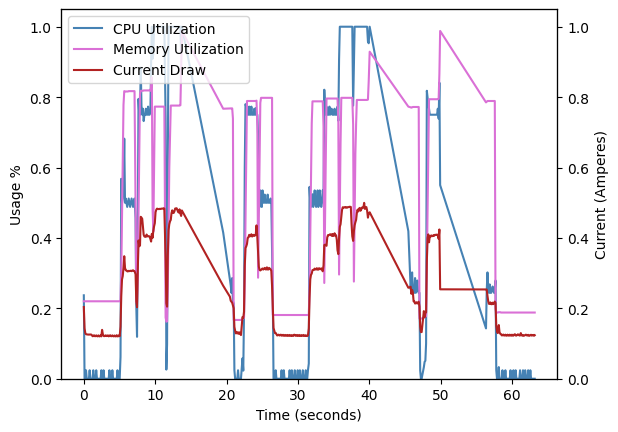

In [13]:
ax = both_df.plot(x='delta', y='cpu_percent', color='steelblue')
ax.set_ylim([0, 1.05])
ax.set(xlabel='Time (seconds)', ylabel='Usage %')
ax.get_legend().remove()

ax2 = ax.twinx()
ax2.yaxis.set_label_position('right')
ax2.set(ylabel='')
both_df.plot(ax=ax2, x='delta', y='virtual_memory', color='orchid')
ax2.set_ylim([0, 1.05])
ax2.get_yaxis().set_visible(False)
ax2.get_legend().remove()

ax3 = ax2.twinx()
both_df.plot(ax=ax3, x='delta', y='adc_voltage', color='firebrick')
ax3.set_ylim([0, 1.05])
ax3.set(ylabel='Current (Amperes)')
ax3.get_legend().remove()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, ['CPU Utilization', 'Memory Utilization', 'Current Draw'], loc=2)

ax.get_figure().savefig('merged_stress_test.pdf', format='pdf')

In [14]:
both_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm,datetime,delta
cpu_percent,1.000000,0.81219,0.991271,0.991271,-0.135997,-0.135997
virtual_memory,0.812190,1.00000,0.834790,0.834790,-0.063520,-0.063520
adc_voltage,0.991271,0.83479,1.000000,1.000000,-0.129357,-0.129357
adc_voltage_norm,0.991271,0.83479,1.000000,1.000000,-0.129357,-0.129357
datetime,-0.135997,-0.06352,-0.129357,-0.129357,1.000000,1.000000
delta,-0.135997,-0.06352,-0.129357,-0.129357,1.000000,1.000000


In [15]:
fftw_df = pd.read_csv('../results/fftw.csv')

fftw_df['cpu_percent_0'] = percent_scaling(fftw_df['cpu_percent_0'])
fftw_df['cpu_percent_1'] = percent_scaling(fftw_df['cpu_percent_1'])
fftw_df['cpu_percent_2'] = percent_scaling(fftw_df['cpu_percent_2'])
fftw_df['cpu_percent_3'] = percent_scaling(fftw_df['cpu_percent_3'])
fftw_df['virtual_memory'] = percent_scaling(fftw_df['virtual_memory'])
fftw_df['adc_voltage_norm'] = min_max_scaling(fftw_df['adc_voltage'])

fftw_df

,time,cpu_percent_0,cpu_percent_1,cpu_percent_2,cpu_percent_3,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-09-07 16:41:40.623437,0.0,0.0,0.0,0.0,0.220,0.456639,0.477132
1,2023-09-07 16:41:40.733764,0.0,0.0,0.0,1.0,0.220,0.469514,0.604450
2,2023-09-07 16:41:40.844216,0.0,0.0,0.0,1.0,0.220,0.429138,0.205192
3,2023-09-07 16:41:40.954665,0.0,0.0,0.0,0.0,0.220,0.471639,0.625464
4,2023-09-07 16:41:41.065090,0.0,0.0,0.0,0.0,0.220,0.449764,0.409147
...,...,...,...,...,...,...,...,...
945,2023-09-07 16:43:25.036758,0.0,0.0,0.0,0.0,0.223,0.409888,0.014833
946,2023-09-07 16:43:25.146801,0.0,0.0,0.0,0.0,0.223,0.471639,0.625464
947,2023-09-07 16:43:25.256804,0.0,0.0,0.0,0.0,0.223,0.424888,0.163164
948,2023-09-07 16:43:25.366837,0.0,0.0,0.0,0.0,0.223,0.437888,0.291718


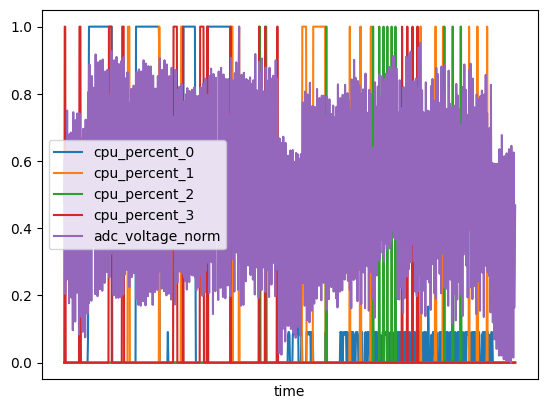

In [16]:
fftw_df.plot(x='time', y=['cpu_percent_0','cpu_percent_1','cpu_percent_2','cpu_percent_3','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [17]:
fftw_df.drop('time', axis=1).corr()

,cpu_percent_0,cpu_percent_1,cpu_percent_2,cpu_percent_3,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent_0,1.000000,-0.129342,-0.067557,0.006761,-0.147778,0.061272,0.061272
cpu_percent_1,-0.129342,1.000000,-0.035974,-0.058731,-0.005328,0.005759,0.005759
cpu_percent_2,-0.067557,-0.035974,1.000000,-0.029747,-0.001314,-0.000289,-0.000289
cpu_percent_3,0.006761,-0.058731,-0.029747,1.000000,-0.071312,0.017396,0.017396
virtual_memory,-0.147778,-0.005328,-0.001314,-0.071312,1.000000,-0.004015,-0.004015
adc_voltage,0.061272,0.005759,-0.000289,0.017396,-0.004015,1.000000,1.000000
adc_voltage_norm,0.061272,0.005759,-0.000289,0.017396,-0.004015,1.000000,1.000000


In [18]:
fftw_pca = PCA(n_components=4)
fftw_pca.fit(fftw_df.drop('time', axis=1))
fftw_pca.components_

array([[ 0.98706443, -0.14174804, -0.02474843,  0.01044274, -0.02610181,
         0.00652715,  0.06454341],
       [ 0.07536777,  0.79391234, -0.02543244, -0.1062739 , -0.00503062,
         0.05969921,  0.59033266],
       [ 0.13437885,  0.56358743, -0.02369681, -0.15447594, -0.00633727,
        -0.0804823 , -0.79584522],
       [ 0.01703307,  0.17467476, -0.04134729,  0.98127207, -0.0270922 ,
        -0.0062512 , -0.06181471]])

In [19]:
fftw_df = pd.read_csv('../results/fftw_perf.csv')

fftw_df['current_norm'] = min_max_scaling(fftw_df['current'])
fftw_df['cycles_sum'] = fftw_df[['cycles_0','cycles_1','cycles_2','cycles_3']].sum(axis=1)
fftw_df['insns_sum'] = fftw_df[['insns_0','insns_1','insns_2','insns_3']].sum(axis=1)

fftw_df

,time,current,cycles_0,insns_0,cycles_1,insns_1,cycles_2,insns_2,cycles_3,insns_3,current_norm,cycles_sum,insns_sum
0,2494,1.696,239403,131122,6459,1519,6524,1569,6482,1593,0.064550,258868,135803
1,3964,1.696,222265,121682,5571,1485,5817,1518,6823,1670,0.064550,240476,126355
2,5443,1.696,224032,122540,5579,1474,5572,1505,6552,1668,0.064550,241735,127187
3,6909,1.696,221833,121960,5628,1485,5571,1501,5558,1481,0.064550,238590,126427
4,8374,1.564,212972,118493,5567,1468,5630,1476,5647,1501,0.029630,229816,122938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23464,30486718,1.664,15744,6481,6071,1764,6153,1780,189841,102422,0.056085,217809,112447
23465,30487930,1.664,15512,6463,6042,1770,6105,1762,187965,100843,0.056085,215624,110838
23466,30489148,1.732,15644,6497,6034,1777,6169,1782,183658,99663,0.074074,211505,109719
23467,30490362,1.732,15529,6465,6057,1765,6062,1756,185651,100640,0.074074,213299,110626


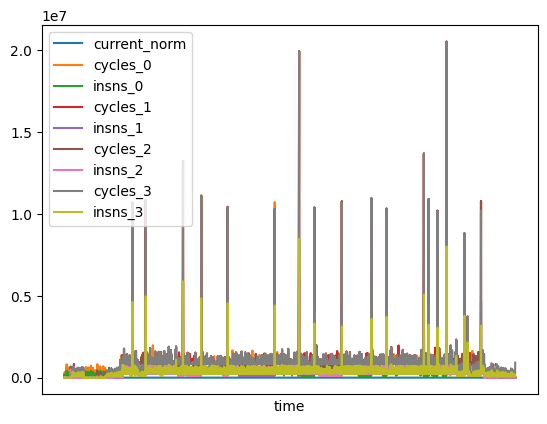

In [20]:
fftw_df.plot(x='time', y=['current_norm','cycles_0','insns_0','cycles_1','insns_1','cycles_2','insns_2','cycles_3','insns_3'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [21]:
fftw_df.drop('time', axis=1).corr()

,current,cycles_0,insns_0,cycles_1,insns_1,cycles_2,insns_2,cycles_3,insns_3,current_norm,cycles_sum,insns_sum
current,1.000000,0.628421,0.581096,0.680650,0.681360,0.665241,0.652833,0.619720,0.562029,1.000000,0.687785,0.681979
cycles_0,0.628421,1.000000,0.951640,0.854396,0.801448,0.840037,0.796757,0.844849,0.784003,0.628421,0.937094,0.917243
insns_0,0.581096,0.951640,1.000000,0.817181,0.776408,0.802993,0.761858,0.806637,0.757316,0.581096,0.894534,0.906935
cycles_1,0.680650,0.854396,0.817181,1.000000,0.942537,0.860676,0.818633,0.869507,0.812676,0.680650,0.950289,0.932549
insns_1,0.681360,0.801448,0.776408,0.942537,1.000000,0.809385,0.777265,0.816174,0.775061,0.681360,0.893322,0.915566
cycles_2,0.665241,0.840037,0.802993,0.860676,0.809385,1.000000,0.949186,0.858381,0.799562,0.665241,0.943699,0.925100
insns_2,0.652833,0.796757,0.761858,0.818633,0.777265,0.949186,1.000000,0.816169,0.767041,0.652833,0.896404,0.910541
cycles_3,0.619720,0.844849,0.806637,0.869507,0.816174,0.858381,0.816169,1.000000,0.941858,0.619720,0.944519,0.927856
insns_3,0.562029,0.784003,0.757316,0.812676,0.775061,0.799562,0.767041,0.941858,1.000000,0.562029,0.882386,0.904158
current_norm,1.000000,0.628421,0.581096,0.680650,0.681360,0.665241,0.652833,0.619720,0.562029,1.000000,0.687785,0.681979


In [22]:
cpu_df = pd.read_csv('../results/cpu_perf.csv')

cpu_df['current_norm'] = min_max_scaling(cpu_df['current'])
cpu_df['cycles_sum'] = cpu_df[['cycles_0','cycles_1','cycles_2','cycles_3']].sum(axis=1)
cpu_df['insns_sum'] = cpu_df[['insns_0','insns_1','insns_2','insns_3']].sum(axis=1)

cpu_df

,time,current,cycles_0,insns_0,cycles_1,insns_1,cycles_2,insns_2,cycles_3,insns_3,current_norm,cycles_sum,insns_sum
0,102536,1.208,863098,379859,551886,252279,267409,123652,311757,146735,0.007407,1994150,902525
1,204116,1.204,68587,34718,373758,199951,80896,37612,42817,21066,0.006349,566058,293347
2,305667,1.192,18050,6688,412419,219224,63626,29436,7130,1800,0.003175,501225,257148
3,407227,1.196,206004,61514,328918,179606,135426,56189,7021,1791,0.004233,677369,299100
4,508788,1.196,40614,16829,375176,201980,82591,37792,6839,1767,0.004233,505220,258368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,16339841,1.200,316947,175409,42845,18567,75076,33959,57607,26495,0.005291,492475,254430
161,16441381,1.188,332541,183746,6920,1794,7239,1851,60787,28553,0.002116,407487,215944
162,16542923,1.196,358547,194077,64421,29246,53871,23926,58453,26558,0.004233,535292,273807
163,16644531,1.196,532962,258681,2056796,1498955,7536,1804,58206,26628,0.004233,2655500,1786068


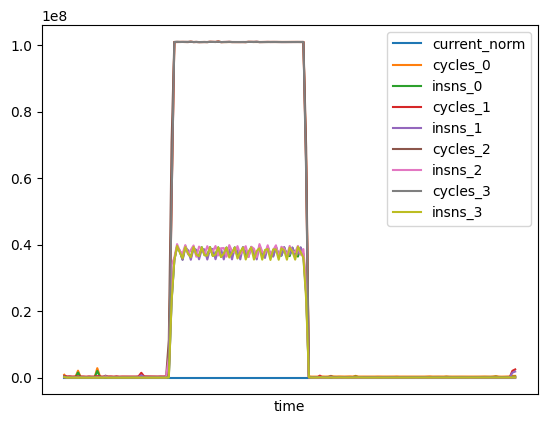

In [23]:
cpu_df.plot(x='time', y=['current_norm','cycles_0','insns_0','cycles_1','insns_1','cycles_2','insns_2','cycles_3','insns_3'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [24]:
cpu_df.drop('time', axis=1).corr()

,current,cycles_0,insns_0,cycles_1,insns_1,cycles_2,insns_2,cycles_3,insns_3,current_norm,cycles_sum,insns_sum
current,1.000000,0.993733,0.993126,0.993857,0.992709,0.993279,0.992044,0.994224,0.994224,1.000000,0.993900,0.993697
cycles_0,0.993733,1.000000,0.999112,0.999950,0.998853,0.999480,0.997211,0.999955,0.998920,0.993733,0.999974,0.999197
insns_0,0.993126,0.999112,1.000000,0.998965,0.999387,0.998922,0.997390,0.998958,0.999370,0.993126,0.999117,0.999708
cycles_1,0.993857,0.999950,0.998965,1.000000,0.998860,0.999312,0.996891,0.999973,0.998870,0.993857,0.999936,0.999069
insns_1,0.992709,0.998853,0.999387,0.998860,1.000000,0.998616,0.997098,0.998790,0.998776,0.992709,0.998907,0.999486
cycles_2,0.993279,0.999480,0.998922,0.999312,0.998616,1.000000,0.998716,0.999289,0.998657,0.993279,0.999648,0.999409
insns_2,0.992044,0.997211,0.997390,0.996891,0.997098,0.998716,1.000000,0.996864,0.997147,0.992044,0.997549,0.998602
cycles_3,0.994224,0.999955,0.998958,0.999973,0.998790,0.999289,0.996864,1.000000,0.998893,0.994224,0.999932,0.999048
insns_3,0.994224,0.998920,0.999370,0.998870,0.998776,0.998657,0.997147,0.998893,1.000000,0.994224,0.998962,0.999494
current_norm,1.000000,0.993733,0.993126,0.993857,0.992709,0.993279,0.992044,0.994224,0.994224,1.000000,0.993900,0.993697


In [37]:
cpu_df = pd.read_csv('../results/cpu_ina3221.csv')

cpu_df['cache_rate_0'] = cpu_df['cache_miss_0'] / cpu_df['cache_hit_0']
cpu_df['cache_rate_1'] = cpu_df['cache_miss_1'] / cpu_df['cache_hit_1']
cpu_df['cache_rate_2'] = cpu_df['cache_miss_2'] / cpu_df['cache_hit_2']
cpu_df['cache_rate_3'] = cpu_df['cache_miss_3'] / cpu_df['cache_hit_3']
cpu_df['cache_rate_avg'] = (cpu_df['cache_rate_0'] + cpu_df['cache_rate_1'] + cpu_df['cache_rate_2'] + cpu_df['cache_rate_3']) / 4

cpu_df['miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['cache_rate_avg'] = (cpu_df['cache_rate_0'] + cpu_df['cache_rate_1'] + cpu_df['cache_rate_2'] + cpu_df['cache_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())

cpu_df.drop('time', axis=1).corr()['current']

current           1.000000
cpu_cycles_0      0.997521
insns_0           0.996190
cache_hit_0       0.996099
cache_miss_0      0.997673
br_insns_0        0.986545
br_miss_0         0.910230
bus_cycles_0      0.997521
cpu_cycles_1      0.997613
insns_1           0.997636
cache_hit_1       0.997256
cache_miss_1      0.997369
br_insns_1        0.989588
br_miss_1         0.972706
bus_cycles_1      0.997613
cpu_cycles_2      0.997632
insns_2           0.997011
cache_hit_2       0.996368
cache_miss_2      0.997810
br_insns_2        0.988380
br_miss_2         0.924878
bus_cycles_2      0.997632
cpu_cycles_3      0.997712
insns_3           0.997823
cache_hit_3       0.997328
cache_miss_3      0.997423
br_insns_3        0.990045
br_miss_3         0.991866
bus_cycles_3      0.997712
cache_rate_0      0.989278
cache_rate_1      0.986787
cache_rate_2      0.990312
cache_rate_3      0.987133
cache_rate_avg    0.989123
miss_rate_0      -0.489495
miss_rate_1      -0.892891
miss_rate_2      -0.884106
m

In [36]:
mem_df = pd.read_csv('../results/mem_ina3221.csv')

mem_df['cache_rate_0'] = mem_df['cache_miss_0'] / mem_df['cache_hit_0']
mem_df['cache_rate_1'] = mem_df['cache_miss_1'] / mem_df['cache_hit_1']
mem_df['cache_rate_2'] = mem_df['cache_miss_2'] / mem_df['cache_hit_2']
mem_df['cache_rate_3'] = mem_df['cache_miss_3'] / mem_df['cache_hit_3']
mem_df['cache_rate_avg'] = (mem_df['cache_rate_0'] + mem_df['cache_rate_1'] + mem_df['cache_rate_2'] + mem_df['cache_rate_3']) / 4

mem_df['miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['miss_rate_avg'] = (mem_df['miss_rate_0'] + mem_df['miss_rate_1'] + mem_df['miss_rate_2'] + mem_df['miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())

mem_df.drop('time', axis=1).corr()['current']

current           1.000000
cpu_cycles_0      0.212476
insns_0           0.059911
cache_hit_0       0.057661
cache_miss_0      0.060474
br_insns_0        0.019123
br_miss_0         0.095477
bus_cycles_0      0.211603
cpu_cycles_1      0.315993
insns_1           0.335506
cache_hit_1       0.324008
cache_miss_1      0.300544
br_insns_1        0.335745
br_miss_1         0.345209
bus_cycles_1      0.315877
cpu_cycles_2      0.610795
insns_2           0.537436
cache_hit_2       0.558833
cache_miss_2      0.357205
br_insns_2        0.489268
br_miss_2         0.328843
bus_cycles_2      0.610773
cpu_cycles_3      0.577436
insns_3           0.473953
cache_hit_3       0.527387
cache_miss_3      0.304400
br_insns_3        0.406651
br_miss_3         0.316658
bus_cycles_3      0.577495
cache_rate_0      0.158351
cache_rate_1     -0.205703
cache_rate_2      0.088841
cache_rate_3      0.043408
cache_rate_avg    0.052200
miss_rate_0       0.187167
miss_rate_1      -0.096364
miss_rate_2      -0.452217
m